In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

from sklearn.preprocessing import LabelEncoder

from matplotlib.ticker import FuncFormatter, MultipleLocator

In [3]:
def clean_data(train_data, test_data):
    #To do: clean the dataset
    
    # replace ? values with the most frequent values in each column
    imputer = SimpleImputer(missing_values='?', strategy="most_frequent")
    train_data.iloc[:, :] = imputer.fit_transform(train_data.iloc[:, :])
    test_data.iloc[:, :] = imputer.fit_transform(test_data.iloc[:, :])

    # replace strange values
    train_data["capital.gain"] = train_data["capital.gain"].replace(99999.0, np.mean(train_data["capital.gain"]))
    test_data["capital.gain"] = test_data["capital.gain"].replace(99999.0, np.mean(test_data["capital.gain"]))

    train_data["age"] = train_data["age"].replace(np.arange(10.0, 20.0, 1), 20.0)
    test_data["age"] = test_data["age"].replace(np.arange(10.0, 20.0, 1), 20.0)

    # drop unnecesarry columns
    train_data = train_data.drop(columns=["fnlwgt", "education.num"])
    test_data = test_data.drop(columns=["fnlwgt", "education.num"])

    # simplify race and education columns
    train_data.race = train_data.race.replace(["Black", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"], "Other")
    test_data.race = test_data.race.replace(["Black", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"], "Other")

    train_data.education = train_data.education.replace(["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"], "School")
    test_data.education = test_data.education.replace(["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"], "School")

    # encode income column as binary values
    label_encoder = LabelEncoder()
    train_data["income"] = label_encoder.fit_transform(train_data["income"])
    test_data["income"] = label_encoder.fit_transform(test_data["income"])

    # write cleaned data to csv files
    train_data.to_csv("cleaned_train_data.csv", index=False)
    test_data.to_csv("cleaned_test_data.csv", index=False)

In [195]:
def plot_numeric_feature_correlation(train_data):
    #To do: plot the correlation matrix for numerical features
    numeric = train_data.select_dtypes(["int64", "float64"])
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    corr_matrix = numeric.corr()
    sns.heatmap(corr_matrix, cmap="Oranges_r", annot=True, square=True)
    plt.xticks(rotation=0)
    plt.title("Correlation between different features", fontweight="bold")

    plt.savefig("plots/correlation.jpg")

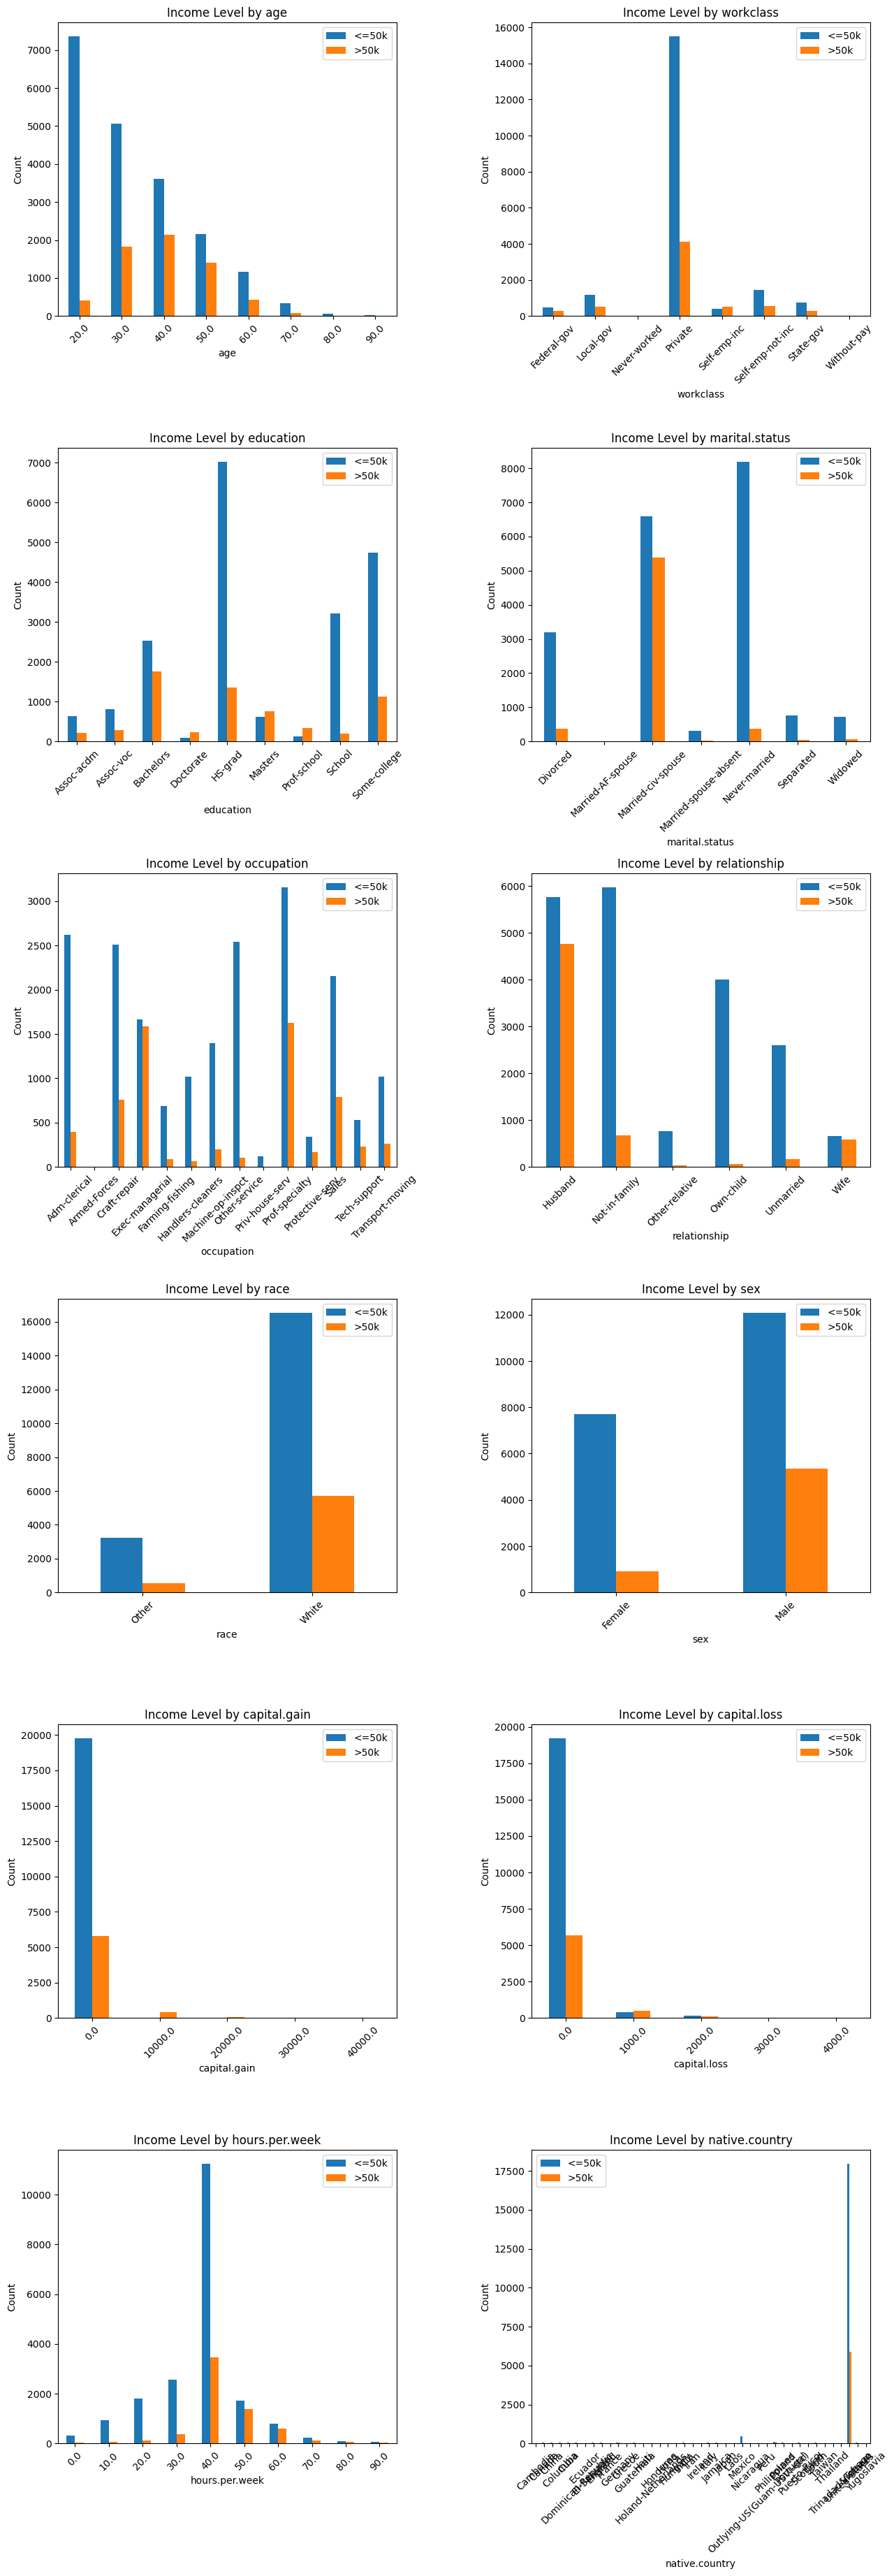

In [245]:
def plot_histogram(train_data):
    # To do: plot histograms for all features
    numeric = train_data.select_dtypes(["int64", "float64"]).columns
    fig, axes = plt.subplots(6, 2, figsize=(15, 45))

    for col in numeric:
        power = np.ceil(np.log10(max(train_data[col])))
        scale = np.ceil(max(train_data[col]) / 10**(power)) * 10**(power-1)
        left = np.floor(min(train_data[col])/ 10) * 10
        right = np.ceil(max(train_data[col])/ 10) * 10
        
        cut = pd.cut(train_data[col], np.arange(left, right+(scale+1), scale), right=False, labels=np.arange(left, right+1, scale))
        train_data[col] = np.array(cut.values)      

    i = 0
    j = 0
    for col in train_data.drop(columns="income").columns:
        ax = axes[i][j]
        grouped = train_data.groupby(col, observed=True)["income"].value_counts().unstack()
        grouped.plot(kind="bar", ax=ax, rot=45)
        ax.legend(["<=50k", ">50k"])
                
        ax.set_title(f"Income Level by {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")
        j += 1
        if j == (axes.shape[1]):
            j = 0
            i += 1
    fig.subplots_adjust(wspace=0.4, hspace=0.45)
    fig.savefig("plots/histograms.jpg")

plot_histogram(train_data)

In [212]:
# Load data
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [213]:
clean_data(train_data, test_data)

# reassign train and test data to contain the cleaned data
train_data = pd.read_csv("cleaned_train_data.csv")
test_data = pd.read_csv("cleaned_test_data.csv")



Object `fig.savefig` not found.


In [215]:
plt.savefig?

Signature: plt.savefig(*args, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, *, dpi='figure', format=None, metadata=None,
          bbox_inches=None, pad_inches=0.1,
          facecolor='auto', edgecolor='auto',
          backend=None, **kwargs
         )

The available output formats depend on the backend being used.

Parameters
----------
fname : str or path-like or binary file-like
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is set, it determines the output format, and the file
    is saved as *fname*.  Note that *fname* is used verbatim, and there
    is no attempt to make the extension, if any, of *fname* match
    *format*, and no extension is appended.

    If *format* is not set, then the format is inferred from the
    extension of *fname*, if there is one.  If *format* is not
    set and *fname* has no extension, then the file

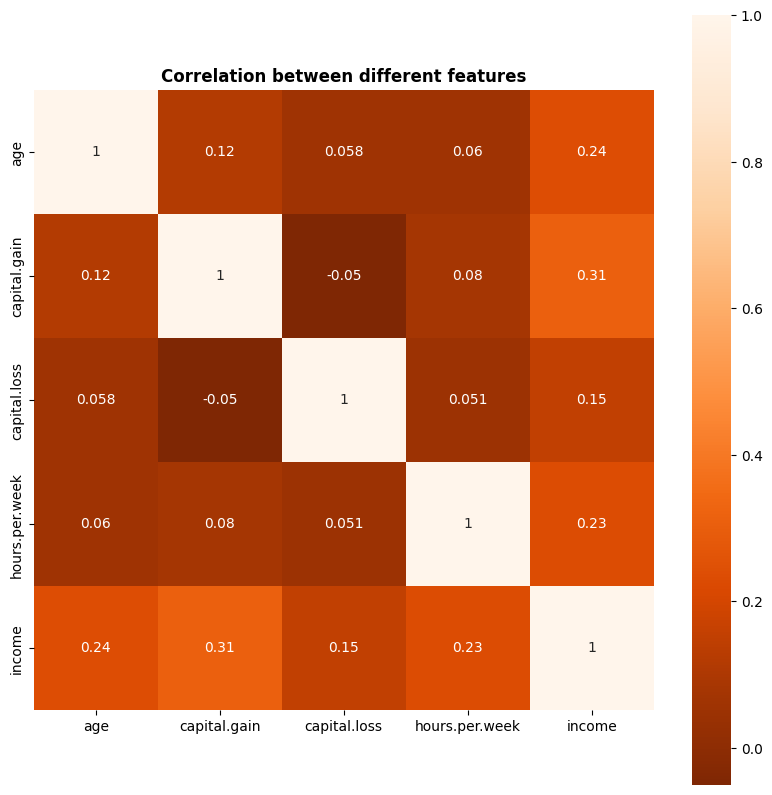

In [206]:
plot_numeric_feature_correlation(train_data)

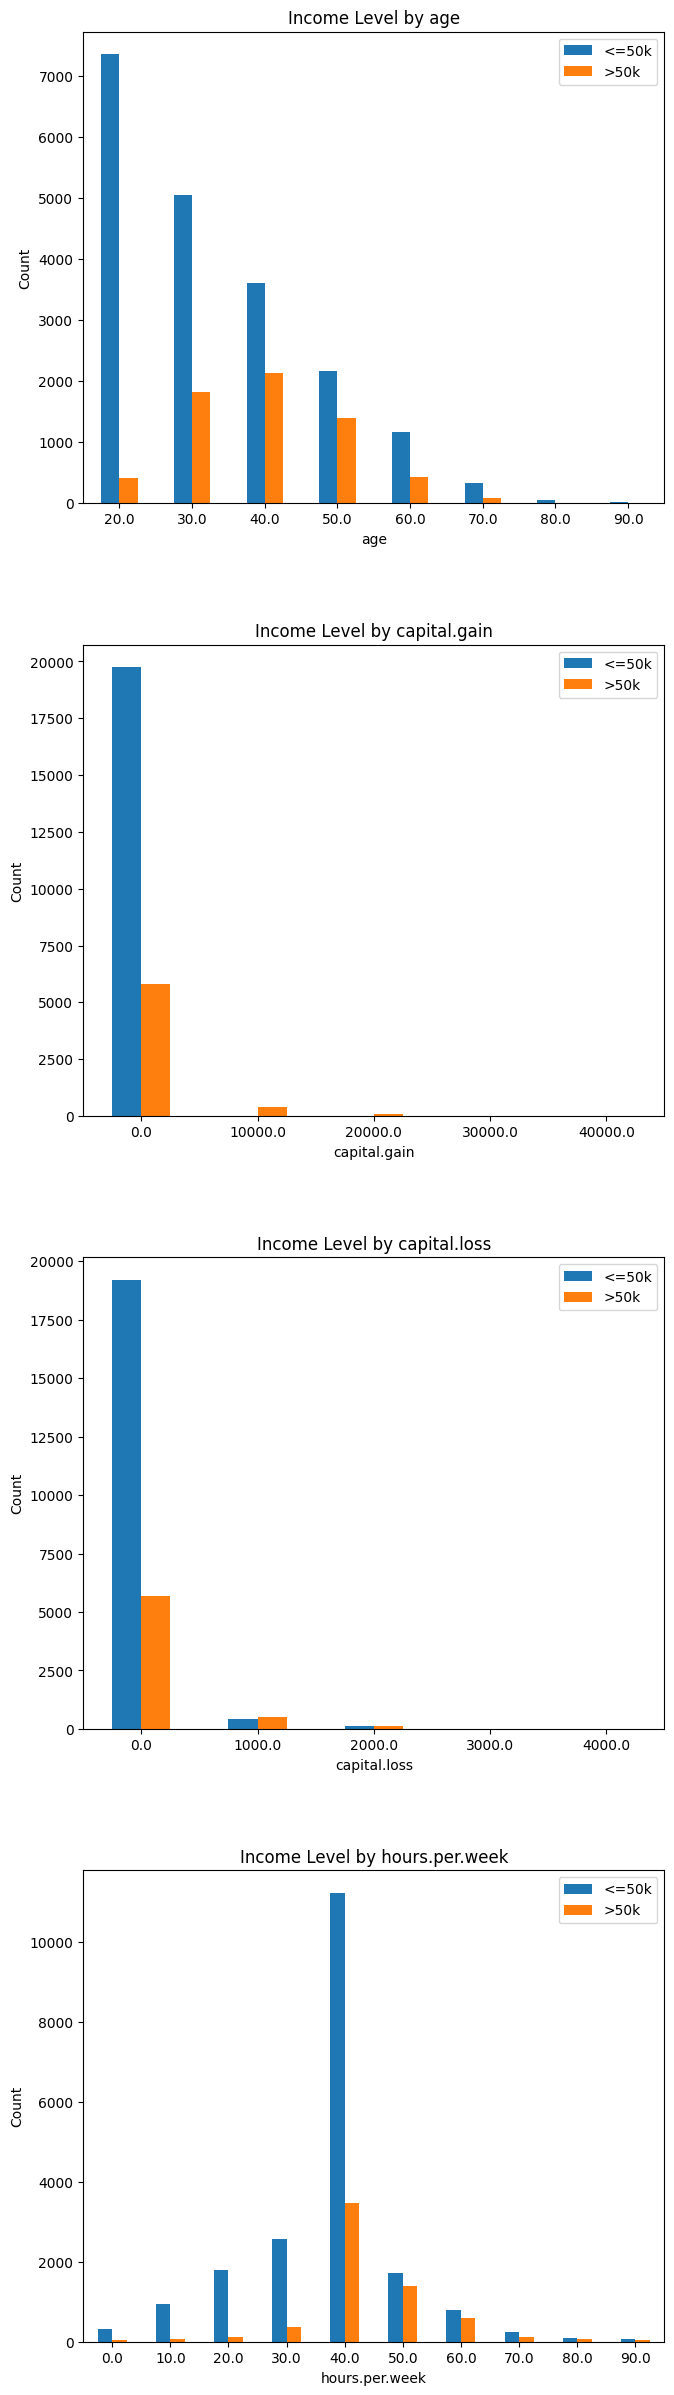

In [217]:
plot_histogram(train_data)